# Recap Session 2 - Python Basics (Sea Level Change, Spring 2021)

#### Step 1: import libraries


In [1]:
import numpy as np
from matplotlib import pyplot as plt

Step 2: useful shortcuts for navigating jupyter notebooks

    While in a cell:
    + [esc]                ==> escape your cell to enter command mode 
    
    While in command mode:
    + [enter]              ==> enter a cell
    + up/down arrows       ==> move up/down cells
    + [b]                  ==> Add a cell under your current cell
    + [a]                  ==> Add a cell above your current cell
    + [c]                  ==> copy current cell
    + [v]                  ==> paste current cell
    + [dd]                 ==> delete the current cell
    + [shift + enter]      ==> run current cell and advance to next cell
    + [command + enter]    ==> run current cell and stay at current cell
    + [m]                  ==> turn current cell into markdown cell
    + [y]                  ==> turn current cell into code cell
    + [r]                  ==> turn current cell into text cell (you won't ever need this)
    + [tab]                ==> indent a line
    + [shift + tab]        ==> unindent a line
    

    

# Recap of Recap session 1: Matrices

We learned several commands for making arrays and matrices:

__Make linearly spaced arrays:__
+ np.arange() 
+ np.linspace()

__Make random vector between zero and one:__
+ np.random.random()

__We learned that you can add, subtract, multiply, divide, and do most operations on matrices,   
and a command that is helpful for checking the dimensions of your matrices:__

+ myVariable.shape 

__We learned several techniques for asking for help if you get stuck:__

+ email me or Jacky
+ type help(myVariable)
+ type myVariable? or myVariable??
+ google your error message or question

__We learned how to write for loops:__

+ <u>simple for loop</u>  
    for item in myList:
        print(item)  
        
        
+ <u>complex for loop</u>  
    for index, value in myList:  
        print(index) = 1, 2, 3, 4, 5
        print(value) = myList[0], myList[1], myList[2], etc
                     

__We learned about some different types in python  
and how to check a variable's type with type(myVariable):__

+ data types: int, str, float, list 

__There other types that you may run into:__

+ tuple, range, complex, dict, set, __bool__ 


Let's talk about booleans for a second.  
Named for british mathematician George Bool (1815-1864),  
a boolean is a true/false statement.  

In [4]:
theOcean = True
aBathTub = False

In [5]:
theOcean

True

In [6]:
aBathTub

False

if/else statements allow us to check whether a condition is true:

In [7]:
if (theOcean is aBathTub):
    print('the ocean is a bathtub')
else:
    print('the ocean is not a bathtub')

the ocean is not a bathtub


functions let us wrap code up in a neat package that we can then call,  
just like we've called numpy functions such as arange:

In [11]:
def bathTubTest(sea_levels):
    
    for i, sea_level in enumerate(sea_levels):
        
        sl_delta = sea_level - sea_levels[i-1]
        
        if ((sl_delta) > 0):
            print("sea level is rising!")
            
        elif (sl_delta < 0):
            print("sea level is falling!")
            
        else:
            print("sea level is staying the same!")
        
    return "Done testing sea level"
     
times = np.arange(2000, 2100, 1)
sea_levels = np.array([1, 2, 4, 3, 2, 2, 4, 5, 4, 2])

bathTubTest(sea_levels)

sea level is falling!
sea level is rising!
sea level is rising!
sea level is falling!
sea level is falling!
sea level is staying the same!
sea level is rising!
sea level is rising!
sea level is falling!
sea level is falling!


'Done testing sea level'

### __Coding exercise 1__ ###

1a. Plot the sea_levels array with a scatter plot.  Label axes, include legend, and make the markers a color of your choice (not default).

1b.  Make a second plot that shows the rates of sea level change.   

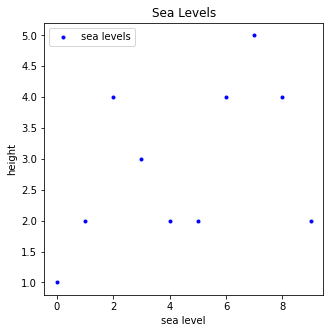

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(sea_levels, '.', color='b', label='sea levels')
ax.set_xlabel('sea level')
ax.set_ylabel('height')
ax.set_title('Sea Levels')

ax.legend()

### __Coding exercise 2__ ###

Seawater expands according to this formula:

$\Delta V = V_o \beta \Delta T$  
    
where $\beta$ is the coefficient of thermal expansion and $\Delta T$ is the change in temperature.  

* The maximum solubility of salt in water to be around 36% (w/w).  
* For water with 35% NaCl dissolved at $25 ^\circ C$: $\beta = 297 * \frac{10^{-6}}{K}$

2a.  Write a function that takes in a volume of sea water and computes how much it would expand if you increased the temperature by 2 degrees C.  

2b. Plot the function vs. an array of different temperatures. 


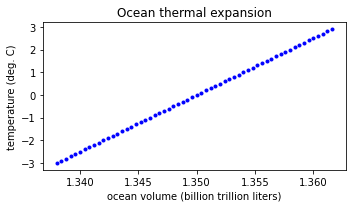

In [13]:
def sea_vols(vol, temp_change):
    
    vol_del = vol * 297*10e-6  * temp_change
    new_vol = vol + vol_del
    return new_vol

vol = 1.35
temps = np.arange(-3, 3, 0.1)
expanded_vols = np.array([sea_vols(vol, t) for t in temps])

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(expanded_vols, temps, '.', color='b')

ax.set_title('Ocean thermal expansion')
ax.set_ylabel('temperature (deg. C)')
ax.set_xlabel('ocean volume (billion trillion liters)');
plt.tight_layout()

In [14]:
fig.savefig('thermal_expansion.png', dpi=100)

## Masking ## 

Python has one other concept that will help you on the homework: nan

nan stands for 'not a number'.  Think of it as a placeholder, a lacuna, a gap.    

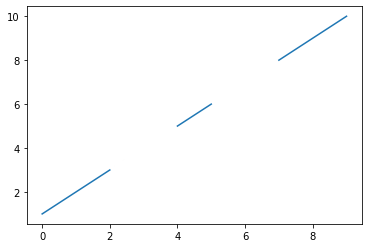

In [15]:
y = np.array([1, 2, 3, np.nan, 5, 6, np.nan, 8, 9, 10])
plt.plot(y)

We can 'mask' an array so that only elements that satisfy some boolean condition are nans or not nans. 

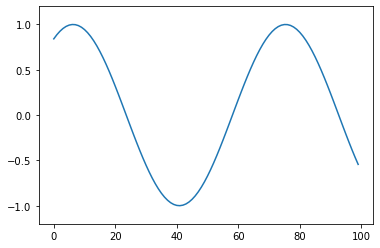

In [16]:
x = np.sin(np.linspace(1, 10, 100))
plt.plot(x)
plt.ylim(-1.2, 1.2)
plt.show() 

Now let's mask it:

(-1.2, 1.2)

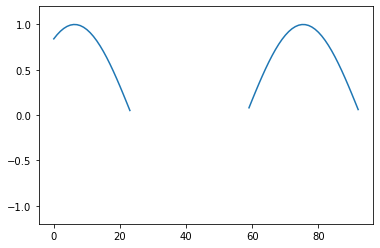

In [17]:
x[x < 0]  = np.nan

plt.plot(x)
plt.ylim(-1.2, 1.2)

# Mapping

Now let's plot maps.  

In [2]:
from scipy.interpolate import griddata
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from matplotlib import path


from matplotlib import colorbar as colorbar
import cmocean


First, load data

In [3]:
#ascii file example
etopo = np.loadtxt('etopo_ice_15.txt') #lon, lat, topography

#numpy .npy binary format example
#create file
np.save('etopo_ice_15.npy',etopo)

#It is be quicker to load *.npy file instead of the .txt file
#load file
# etopo = np.load('etopo_ice_15.npy')

Now we prepare data to be plotted.  
We need to create 3 2-D matrices in which each element represents the lat, lon, or topography at the given point.

In [4]:
if(True):
    ##This is one way ... better for irregularly space data
    print('linear interpolation ...')
    lon = np.arange(etopo[:,0].min(),etopo[:,0].max()+1,0.5)
    lat = np.arange(etopo[:,1].min(),etopo[:,1].max()+1,0.5)
    lon2,lat2 = np.meshgrid(lon,lat)
    topo2 = griddata((etopo[:,0],etopo[:,1]),etopo[:,2],(lon2, lat2), method='linear')

if(False):
    ##Another way is to reshape the columns vectors of etopo into 2D arrays
    ##This only works if the data is already in a regular grid
    print('reshape input data to 2D grids')
    num1 = np.unique(etopo[:,0]).size
    num2 = np.unique(etopo[:,1]).size

    lon2 = np.reshape(etopo[:,0],(num1,num2)).T
    lat2 = np.reshape(etopo[:,1],(num1,num2)).T
    #Are these the matrices you are looking for?
    #print(lon2)
    #print(lat2)
    topo2 = np.reshape(etopo[:,2],(num1,num2)).T

linear interpolation ...


Sanity check: did it work?

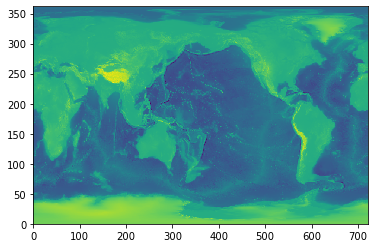

In [5]:
plt.pcolormesh(topo2)

Now we want to plot it with latitudes and longitudes

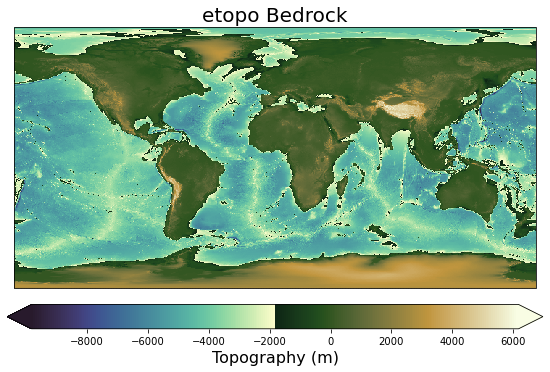

In [6]:
#Set the figure window size
fig = plt.figure(figsize=(12,6))

# add a subplot
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add data
pc = ax.pcolormesh(lon,
                   lat,
                   topo2,
                   cmap = cmocean.cm.topo, 
                   transform=ccrs.PlateCarree())

#Set colormap parameters
cax,kw = colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.8)
cb=fig.colorbar(pc,cax=cax,extend='both', **kw)
cb.set_label('Topography (m)',size=16)

# Add title
ax.set_title('etopo Bedrock', fontsize=20);

#Show plot
# plt.show()


# Now let's play with a region

First, make a Polygon around Florida

In [7]:
p = path.Path([(276,30), (277,24.5), (280.5,25), (280.5,27.6), (280,30.5), (276,30)])

Next, store lon/lat as tuple pairs

In [8]:
tmp = np.array((etopo[:,0],etopo[:,1])).T
tmp

array([[ 1.2000e-01, -8.9880e+01],
       [ 1.2000e-01, -8.9620e+01],
       [ 1.2000e-01, -8.9380e+01],
       ...,
       [ 3.5988e+02,  8.9380e+01],
       [ 3.5988e+02,  8.9620e+01],
       [ 3.5988e+02,  8.9880e+01]])

Produce a mask identifying points inside the polygon


In [9]:
mask = p.contains_points(tmp)

In [10]:
print(mask)
print(mask.shape)

[False False False ... False False False]
(1036800,)


Our mask can also be used to identify points outside the polygon  
So, set values of etopo[0,2] to nan if outside polygon  

Question: why etopo[0,2]?

In [11]:
etopo[~mask,2] = np.nan

## Format Data for plotting

Obtain the number of unique elements in etopo[:,?]

In [12]:
num1 = np.unique(etopo[:,0]).size
num2 = np.unique(etopo[:,1]).size

Using the numpy function reshape our 1D array is transformed into a 2D array  
We then take its transpose *.t   

_Note, this assumes the data was stored in a particular order_

In [13]:
lon2 = np.reshape(etopo[:,0],(num1,num2)).T
lat2 = np.reshape(etopo[:,1],(num1,num2)).T
topo2 = np.reshape(etopo[:,2],(num1,num2)).T

## Analyze region


number of elements in polygon   
~np.isnan(...) is a masked used to identify elements that are not nan

In [14]:
nume = etopo[~np.isnan(etopo[:,2]),2].size

Find a topography greater than 0  
as before, etopo[...] >= 0.0 is a mask to identify elements greater than 0

In [15]:
above0 = etopo[etopo[:,2] >= 0.0,2].size
above20 = etopo[etopo[:,2] >= 20.0,2].size
above50 = etopo[etopo[:,2] >= 50.0,2].size

print("Percent above 0 m: ",(100*above0/nume))
print("Percent above 20 m: ",(100*above20/nume))
print("Percent above 50 m: ",(100*above50/nume))

Percent above 0 m:  45.3757225433526
Percent above 20 m:  16.184971098265898
Percent above 50 m:  0.0


# Plot region

Our polygon,p, is stored in a path data structure.  
we can access its points through the attribute vertices

In [16]:
llat = p.vertices[:,1].min()-1
ulat = p.vertices[:,1].max()+1
llon = p.vertices[:,0].min()-1
ulon = p.vertices[:,0].max()+1

create Cartopy map with coastlines

Text(0.5, 1.0, 'Florida: etopo bedrock')

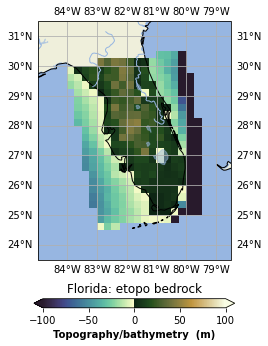

In [17]:
#Set the figure window size
fig = plt.figure(figsize=(12,6))

# add a subplot
ax = fig.add_subplot(1, 1, 1, 
                     projection=ccrs.PlateCarree())


# set the extent (you will need to change this for your problem set)
ax.set_extent([llon, ulon, llat, ulat], crs=ccrs.PlateCarree())


# add coastal features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)


# add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add data
pc = ax.pcolormesh(lon2,
                   lat2,
                   topo2,
                   vmin=-100, 
                   vmax=100,
                   cmap = cmocean.cm.topo, 
                   transform=ccrs.PlateCarree())

#Set colormap parameters
cax,kw = colorbar.make_axes(ax,
                            location='bottom',
                            pad=0.12,
                            shrink=0.3,)
cb=fig.colorbar(pc,cax=cax,extend='both',**kw)
cb.set_label('Topography/bathymetry  (m)',size=10, weight='bold')

#Add title
plt.title('Florida: etopo bedrock')